<a href="https://colab.research.google.com/github/KarinaRmzG/Neuronal-Networks/blob/main/Stroke_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalación del Repositorio**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Sube el archivo kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karinaramrezgalindo","key":"641c96027b70f960a28a3ef34c29a00e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d afridirahman/brain-stroke-ct-image-dataset

 81% 49.0M/60.4M [00:00<00:00, 96.6MB/s]
100% 60.4M/60.4M [00:00<00:00, 78.1MB/s]


In [ ]:
!unzip brain-stroke-ct-image-dataset.zip -d dataset

Archive:  brain-stroke-ct-image-dataset.zip
  inflating: dataset/Brain_Data_Organised/Normal/100 (1).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (10).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (11).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (12).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (13).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (14).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (15).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (16).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (17).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (18).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (19).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (2).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (20).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (21).jpg  
  inflating: dataset/Brain_Data_Organised/Normal/100 (22).jpg 

INICIO

In [ ]:
# Librerías necesarias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
# Librerías relacionadas con imágenes
import cv2
from PIL import Image
# Importa TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import (
    Conv2D, GlobalAveragePooling2D, Reshape, Dense, multiply, add, Permute, Lambda, Layer, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Add,Activation, GlobalMaxPooling2D
)
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [ ]:
# Rutas a las carpetas en Google Drive
normal_path = "/content/dataset/Brain_Data_Organised/Normal"
stroke_path = "/content/dataset/Brain_Data_Organised/Stroke"

# Obtiene la lista de archivos en las carpetas
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

# Imprime la cantidad de imágenes en cada carpeta
print("Images in Normal Data:", len(normal_folder))
print("Images in Stroke Data:", len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [ ]:
data = []
primal_data = []

# Recorre las imágenes en la carpeta normal
for img_file in normal_folder:
    # Abre la imagen desde Google Drive
    image = Image.open(os.path.join(normal_path, img_file))
    # Ajusta el tamaño
    image = image.resize((224, 224))
    # Convierte a RGB
    image = image.convert('RGB')
    # Convierte la imagen a un arreglo numpy
    image = np.array(image)
    # Aplica un filtro de mediana con OpenCV para eliminar ruido
    image = cv2.medianBlur(image, 5)  # '5' es el tamaño del kernel
    # Agrega la imagen sin procesar al conjunto de datos primal_data
    primal_data.append(image)
    # Agrega la imagen procesada al conjunto de datos data
    data.append(image)

# Recorre las imágenes en la carpeta de accidente cerebrovascular (stroke)
for img_file in stroke_folder:
    # Abre la imagen desde Google Drive
    image = Image.open(os.path.join(stroke_path, img_file))
    # Ajusta el tamaño
    image = image.resize((224, 224))
    # Convierte a RGB
    image = image.convert('RGB')
    # Convierte la imagen a un arreglo numpy
    image = np.array(image)
    # Aplica un filtro de mediana con OpenCV para eliminar ruido
    image = cv2.medianBlur(image, 5)  # '5' es el tamaño del kernel
    # Agrega la imagen sin procesar al conjunto de datos primal_data
    primal_data.append(image)
    # Agrega la imagen procesada al conjunto de datos data
    data.append(image)

In [ ]:
print(len(data))
print(data[0])
print(data[0].shape)

2501
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(224, 224, 3)


In [ ]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
# Crear etiquetas para las imágenes
normal_label = [0] * len(normal_folder)  # Etiqueta 0 para imágenes normales
stroke_label = [1] * len(stroke_folder)  # Etiqueta 1 para imágenes de accidente cerebrovascular
Target_label = normal_label + stroke_label  # Combinar etiquetas en una lista

# Imprimir la longitud de las etiquetas combinadas
print("Length of Target Labels:", len(Target_label))

Length of Target Labels: 2501


In [ ]:
# Convertir la lista de imágenes a un arreglo numpy
x = np.array(data)

# Convertir la lista de etiquetas a un arreglo numpy
y = np.array(Target_label)

# Imprimir la primera imagen en el arreglo 'x'
print("First Image in the 'x' array:")
print(x[0])

First Image in the 'x' array:
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Shape of Training Data (x_train):", x_train.shape)
print("Shape of Testing Data (x_test):", x_test.shape)
print("Shape of Training Labels (y_train):", y_train.shape)
print("Shape of Testing Labels (y_test):", y_test.shape)

Shape of Training Data (x_train): (1750, 224, 224, 3)
Shape of Testing Data (x_test): (751, 224, 224, 3)
Shape of Training Labels (y_train): (1750,)
Shape of Testing Labels (y_test): (751,)


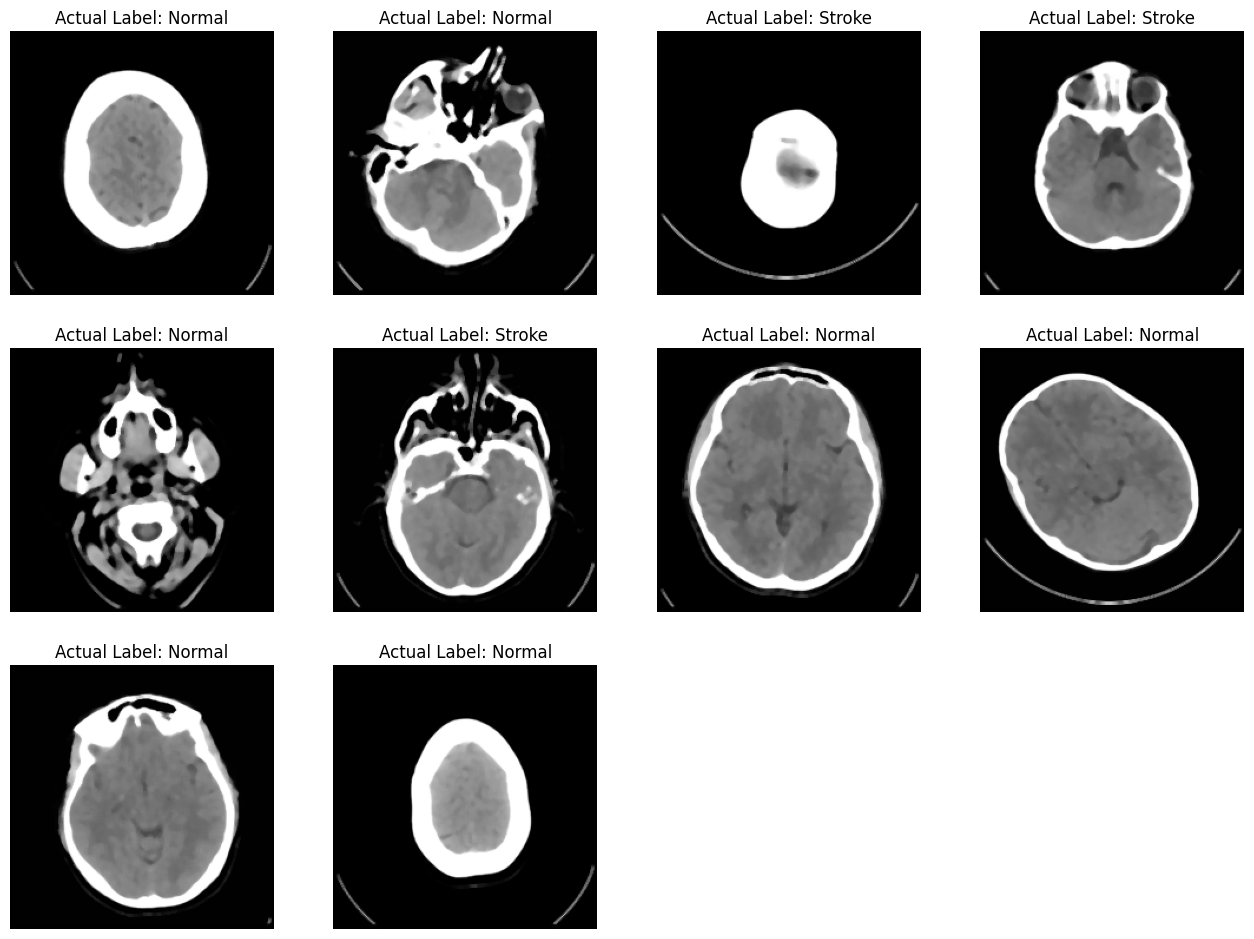

In [ ]:
# Etiquetas de clase para representar las clases "Normal" y "Stroke"
class_labels = ["Normal", "Stroke"]

# Crear una figura para mostrar varias imágenes
plt.figure(figsize=(16, 24))

# Iterar sobre las primeras 10 imágenes del conjunto de entrenamiento
for i in range(10):
    # Crear un subplot en la matriz 6x4
    plt.subplot(6, 4, i + 1)

    # Mostrar la imagen en el subplot
    plt.imshow(x_train[i])

    # Establecer el título con la etiqueta real de la imagen
    plt.title(f"Actual Label: {class_labels[y_train[i]]}")

    # Desactivar los ejes para una mejor presentación
    plt.axis("off")

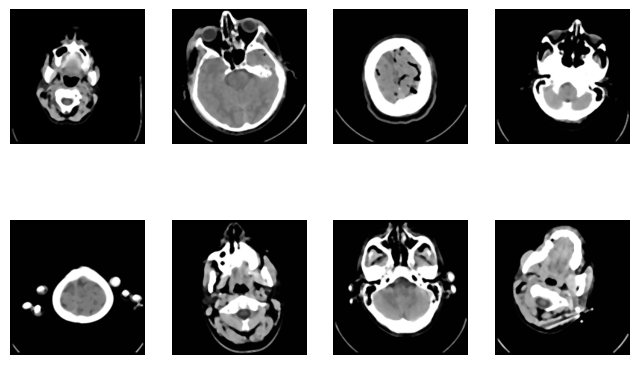

In [ ]:
# Convertir la lista de imágenes sin procesar a un arreglo numpy
x_primal = np.array(primal_data)

# Convertir la lista de etiquetas a un arreglo numpy
y = np.array(Target_label)

# Crear una figura para mostrar varias imágenes
plt.figure(figsize=(8, 16))

# Iterar sobre las primeras 8 imágenes del conjunto sin procesar
for i in range(8):
    # Crear un subplot en la matriz 6x4
    plt.subplot(6, 4, i + 1)

    # Mostrar la imagen sin procesar en el subplot
    plt.imshow(x_primal[i])

    # Desactivar los ejes para una mejor presentación
    plt.axis("off")

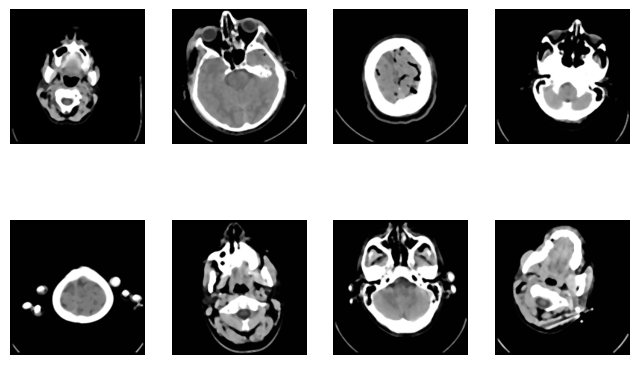

In [ ]:
# Crear una figura para mostrar varias imágenes
plt.figure(figsize=(8, 16))

# Iterar sobre las primeras 8 imágenes del conjunto de datos procesado
for i in range(8):
    # Crear un subplot en la matriz 6x4
    plt.subplot(6, 4, i + 1)

    # Mostrar la imagen procesada en el subplot
    plt.imshow(x[i])

    # Desactivar los ejes para una mejor presentación
    plt.axis("off")

# **CBAM attention**
Convolutional Block Attention Module es un módulo de atención que se utiliza en redes neuronales convolucionales para mejorar la capacidad del modelo para enfocarse en partes específicas de la entrada, mejorando así la calidad de las representaciones aprendidas.
Fue propuesto en el artículo "CBAM: Convolutional Block Attention Module" por Sanghyun Woo, Jongchan Park, Joon-Young Lee e In So Kweon, presentado en la Conferencia de Computación Visual y del Patrón en 2018.

El CBAM attention module consiste en dos componentes principales:
* Módulo de atención espacial (Spatial Attention Module)
* Módulo de atención de canal (Channel Attention Module).

#Módulo de Atención de Canal (Channel Attention Module):

Este módulo se centra en resaltar canales importantes en la entrada.
Utiliza operaciones como la operación de pooling para capturar información estadística a lo largo de los canales.
Calcula pesos de atención para cada canal y los aplica a la entrada original.

In [ ]:
class ChannelAttention(Layer):
    def __init__(self, ratio=8, **kwargs):
        """
        Capa de atención de canal.

        Parámetros:
        - ratio: Factor de reducción para el tamaño de la capa compartida (por defecto, 8).
        """
        super(ChannelAttention, self).__init__(**kwargs)
        self.ratio = ratio

    def build(self, input_shape):
        """
        Construye la capa de atención de canal.

        Parámetros:
        - input_shape: Forma del tensor de entrada.
        """
        self.shared_layer_one = Dense(input_shape[-1] // self.ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        self.shared_layer_two = Dense(input_shape[-1], kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        super(ChannelAttention, self).build(input_shape)

    def call(self, inputs):
        """
        Realiza la operación de la capa.

        Parámetros:
        - inputs: Tensor de entrada.

        Retorna:
        - Tensor después de aplicar la atención de canal.
        """
        avg_pool = GlobalAveragePooling2D()(inputs)
        avg_pool = Reshape((1, 1, inputs.shape[-1]))(avg_pool)
        avg_pool = self.shared_layer_one(avg_pool)
        avg_pool = self.shared_layer_two(avg_pool)

        max_pool = GlobalMaxPooling2D()(inputs)
        max_pool = Reshape((1, 1, inputs.shape[-1]))(max_pool)
        max_pool = self.shared_layer_one(max_pool)
        max_pool = self.shared_layer_two(max_pool)

        attention = add([avg_pool, max_pool])
        attention = tf.keras.activations.sigmoid(attention)
        return multiply([inputs, attention])


# Módulo de Atención Espacial (Spatial Attention Module):

Este módulo se enfoca en resaltar regiones espaciales importantes en la entrada.
Utiliza operaciones como la operación de pooling para capturar la información espacial relevante.
Calcula pesos de atención para cada posición espacial y los aplica a la entrada original.

In [ ]:
class SpatialAttention(Layer):
    def __init__(self, kernel_size=7, **kwargs):
        """
        Capa de atención espacial.

        Parámetros:
        - kernel_size: Tamaño del kernel para la convolución espacial (por defecto, 7).
        """
        super(SpatialAttention, self).__init__(**kwargs)
        self.kernel_size = kernel_size

    def build(self, input_shape):
        """
        Construye la capa de atención espacial.

        Parámetros:
        - input_shape: Forma del tensor de entrada.
        """
        self.conv = Conv2D(1, self.kernel_size, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)
        super(SpatialAttention, self).build(input_shape)

    def call(self, inputs):
        """
        Realiza la operación de la capa.

        Parámetros:
        - inputs: Tensor de entrada.

        Retorna:
        - Tensor después de aplicar la atención espacial.
        """
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
        attention = tf.concat([avg_pool, max_pool], axis=-1)
        attention = self.conv(attention)
        return multiply([inputs, attention])

In [ ]:
def cbam_block(input_tensor, ratio=8, kernel_size=7):
    """
    Construye un bloque CBAM (Convolutional Block Attention Module).

    Parámetros:
    - input_tensor: Tensor de entrada al bloque CBAM.
    - ratio: Factor de reducción para la capa compartida de atención de canal (por defecto, 8).
    - kernel_size: Tamaño del kernel para la convolución espacial (por defecto, 7).

    Retorna:
    - Tensor después de aplicar el bloque CBAM.
    """
    x = ChannelAttention(ratio)(input_tensor)
    x = SpatialAttention(kernel_size)(x)
    return x

# **Create Model Using CNN**

In [ ]:
def residual_block(x, filters):
    """
    Define un bloque residual.

    Parámetros:
    - x: Tensor de entrada al bloque residual.
    - filters: Número de filtros a utilizar en las capas convolucionales.

    Retorna:
    - Tensor después de aplicar el bloque residual.
    """
    # Capa de conexión directa (shortcut)
    shortcut = x

    # Primera capa convolucional
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    # Segunda capa convolucional
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", activation=None)(x)
    x = BatchNormalization()(x)

    # Suma de la conexión directa y la salida de las capas convolucionales
    x = Add()([x, shortcut])

    # Aplicar la función de activación ReLU
    x = Activation("relu")(x)

    return x

# Definir la entrada del modelo
input_tensor = Input(shape=(224, 224, 3))

# Primera capa convolucional y de pooling
x = Conv2D(filters=100, kernel_size=(3, 3), padding="same", activation="relu")(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Aplicar el módulo CBAM
x = cbam_block(x)

# Aplicar el bloque residual
x = residual_block(x, 100)

# Segunda capa convolucional y de pooling
x = Conv2D(filters=80, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Aplicar el módulo CBAM
x = cbam_block(x)

# Aplicar el bloque residual
x = residual_block(x, 80)

# Tercera capa convolucional y de pooling
x = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Aplicar el módulo CBAM
x = cbam_block(x)

# Aplicar el bloque residual
x = residual_block(x, 64)

# Aplanar y conectar capas densas
x = Flatten()(x)
x = Dense(units=1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(units=1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Capa de salida
output_tensor = Dense(units=1, activation="sigmoid")(x)

# Crear y compilar el modelo
model = Model(inputs=input_tensor, outputs=output_tensor)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Imprimir el resumen del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 100)        2800      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 224, 224, 100)        400       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 100)        0         ['batch_normalization[0][0

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    x_train,             # Conjunto de entrenamiento (entradas)
    y_train,             # Conjunto de entrenamiento (etiquetas)
    batch_size=32,       # Tamaño del lote utilizado en cada iteración
    epochs=15,           # Número de épocas (iteraciones completas a través del conjunto de entrenamiento)
    validation_data=(x_test, y_test)  # Datos de validación para evaluar el modelo después de cada época
)

Epoch 1/15
55/55 [==============================] - 53s 499ms/step - loss: 2.4662 - accuracy: 0.5886 - val_loss: 0.6907 - val_accuracy: 0.6258
Epoch 2/15
55/55 [==============================] - 20s 362ms/step - loss: 0.6824 - accuracy: 0.6091 - val_loss: 0.6841 - val_accuracy: 0.6258
Epoch 3/15
55/55 [==============================] - 21s 380ms/step - loss: 0.6706 - accuracy: 0.6606 - val_loss: 0.6748 - val_accuracy: 0.6245
Epoch 4/15
55/55 [==============================] - 21s 382ms/step - loss: 0.6172 - accuracy: 0.7177 - val_loss: 0.6701 - val_accuracy: 0.6218
Epoch 5/15
55/55 [==============================] - 21s 385ms/step - loss: 0.6073 - accuracy: 0.7074 - val_loss: 0.6573 - val_accuracy: 0.6352
Epoch 6/15
55/55 [==============================] - 21s 383ms/step - loss: 0.5336 - accuracy: 0.7526 - val_loss: 0.6388 - val_accuracy: 0.6791
Epoch 7/15
55/55 [==============================] - 20s 370ms/step - loss: 0.5113 - accuracy: 0.7857 - val_loss: 0.6392 - val_accuracy: 0.6658

# **Evaluación de modelos en datos de prueba y entrenamiento**

In [ ]:
# Evaluación del modelo en el conjunto de prueba
loss_test, acc_test = model.evaluate(x_test, y_test)
print("Loss on Test Data:", loss_test)
print("Accuracy on Test Data:", acc_test)

# Evaluación del modelo en el conjunto de entrenamiento
loss_train, acc_train = model.evaluate(x_train, y_train)
print("Loss on Train Data:", loss_train)
print("Accuracy on Train Data:", acc_train)

24/24 [==============================] - 2s 80ms/step - loss: 0.3439 - accuracy: 0.8522
Loss on Test Data: 0.34389930963516235
Accuracy on Test Data: 0.8521970510482788
55/55 [==============================] - 5s 82ms/step - loss: 0.2090 - accuracy: 0.9149
Loss on Train Data: 0.2090095430612564
Accuracy on Train Data: 0.9148571491241455


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(x_test)

# Convertir las predicciones a etiquetas binarias
y_pred_test_label = [1 if i >= 0.5 else 0 for i in y_pred_test]

24/24 [==============================] - 3s 78ms/step


In [ ]:
# Imprimir las primeras 10 etiquetas reales en el conjunto de prueba
print("Actual Label:", y_test[:10])

# Imprimir las primeras 10 etiquetas predichas en el conjunto de prueba
print("Predicted Label:", y_pred_test_label[:10])

Actual Label: [0 0 0 0 0 0 1 1 0 0]
Predicted Label: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


# **Evaluación de métricas sobre datos de prueba**

In [ ]:
# Imprimir métricas de evaluación en el conjunto de prueba
print("----- Metrics Evaluation On Test Data -----")
print()

# Imprimir matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_label))
print()

# Imprimir informe de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_test_label))

----- Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[373  97]
 [ 14 267]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       470
           1       0.73      0.95      0.83       281

    accuracy                           0.85       751
   macro avg       0.85      0.87      0.85       751
weighted avg       0.88      0.85      0.85       751



# **Predicciones de imágenes sobre datos de prueba**

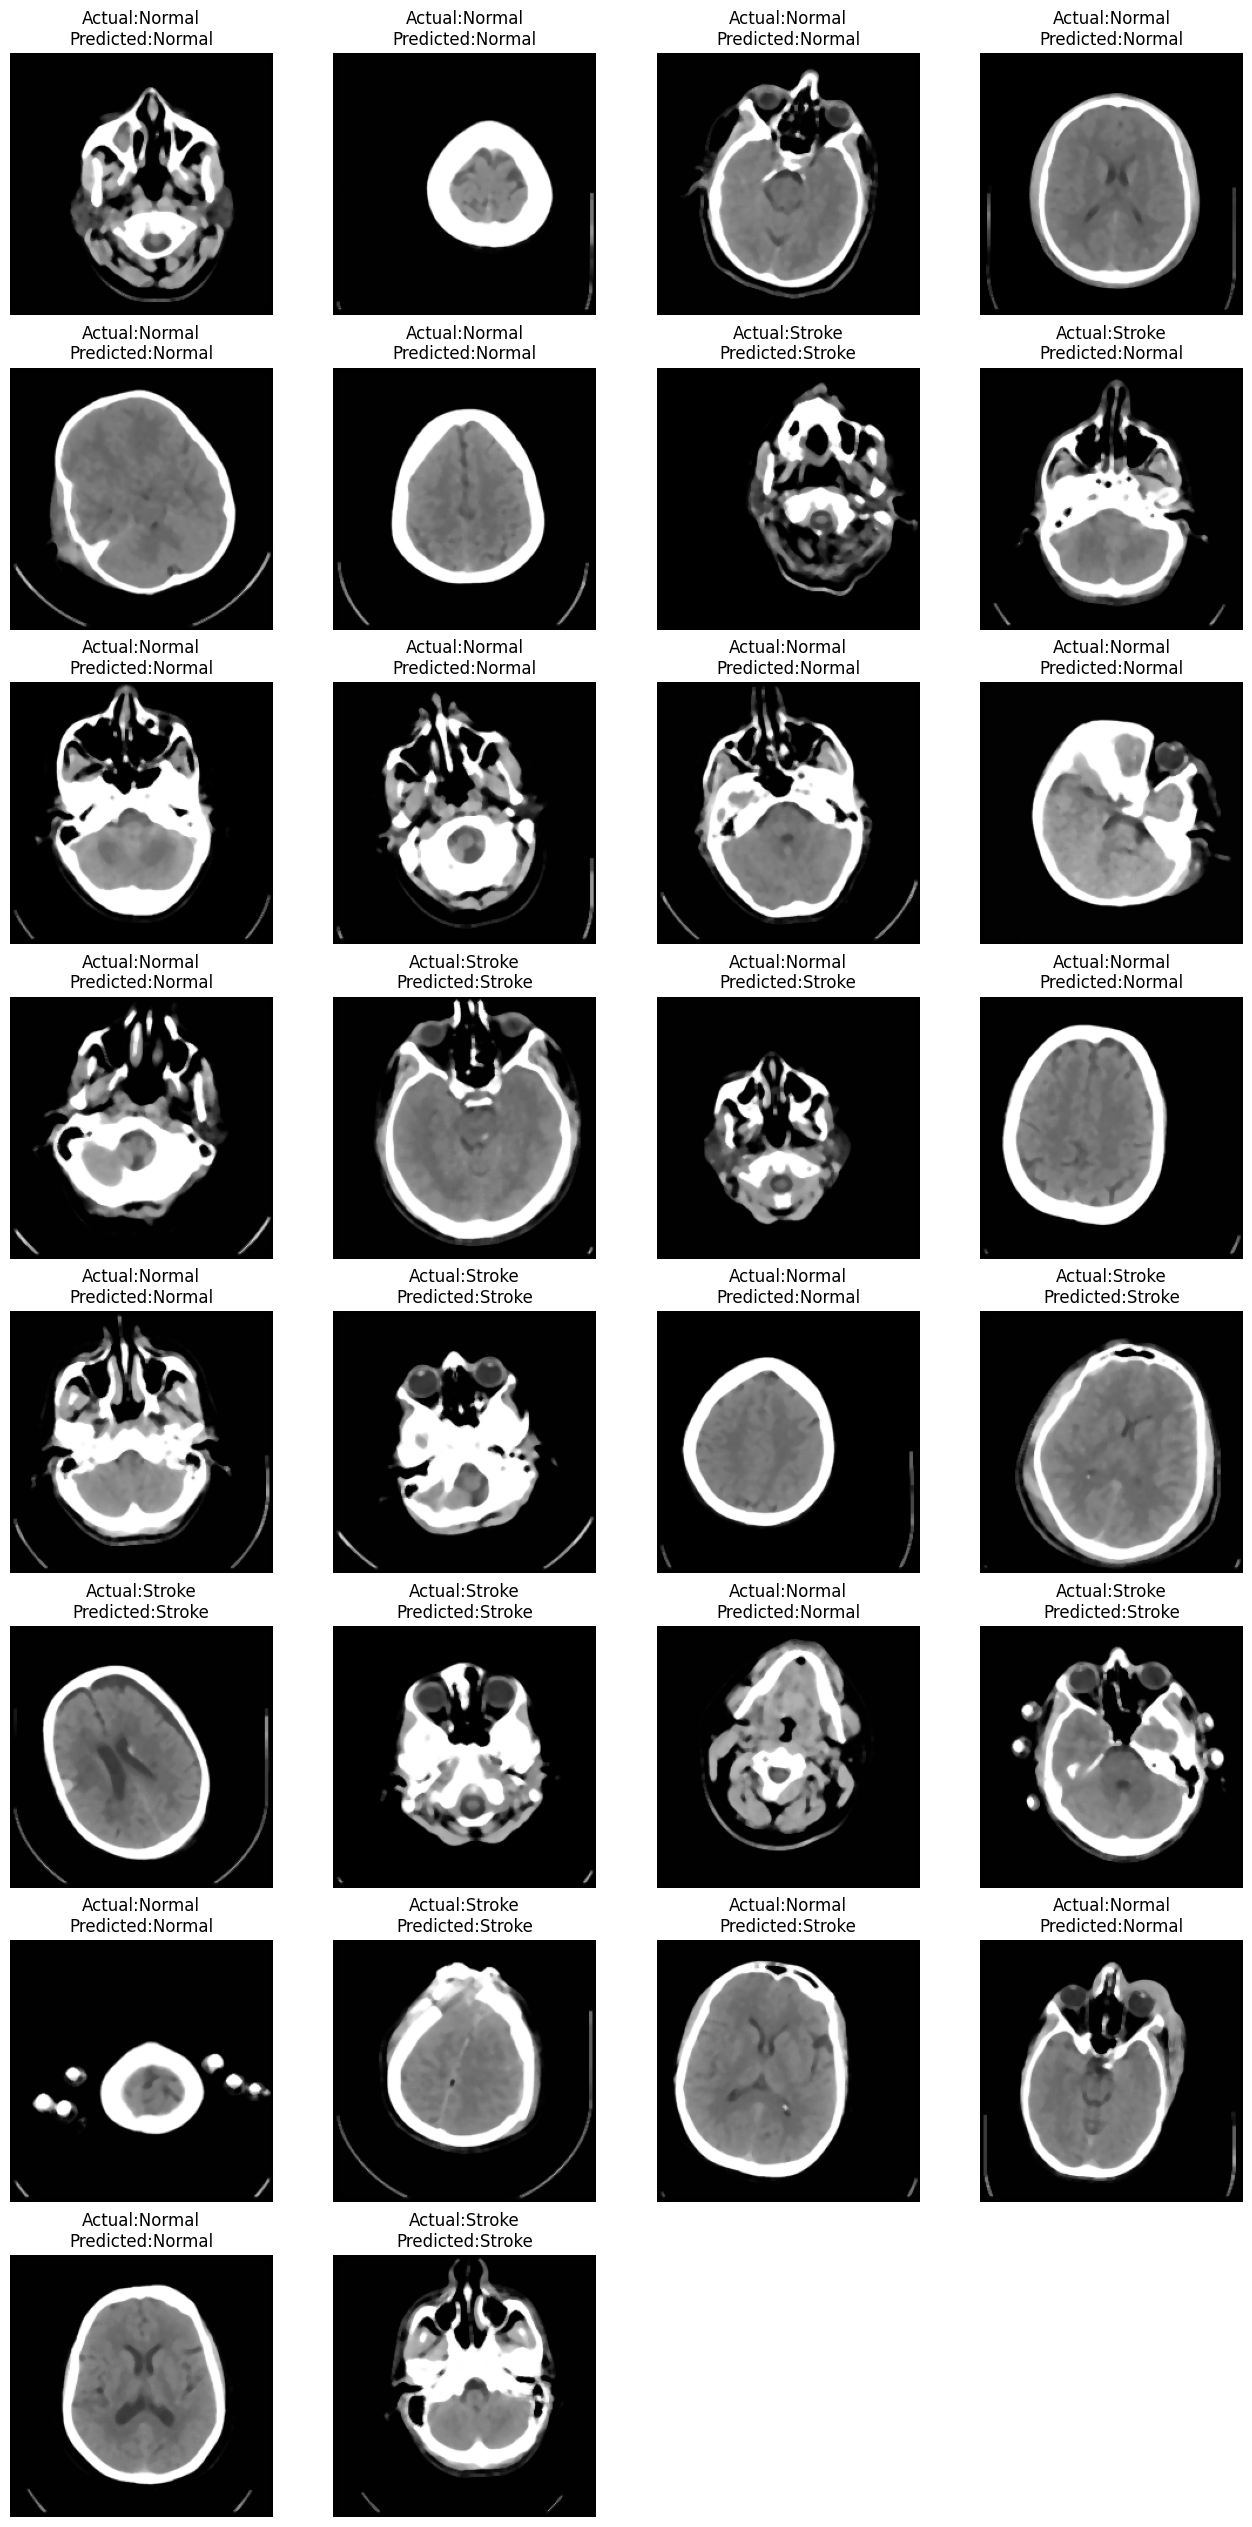

In [ ]:
# Definir las etiquetas de clase
class_labels = ["Normal", "Stroke"]

# Crear una figura para mostrar varias imágenes con sus etiquetas
plt.figure(figsize=(16, 32))

# Iterar sobre las primeras 30 imágenes del conjunto de prueba
for i in range(30):
    # Crear un subplot en la matriz 8x4
    plt.subplot(8, 4, i + 1)

    # Mostrar la imagen del conjunto de prueba
    plt.imshow(x_test[i])

    # Configurar el título con las etiquetas reales y predichas
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")

    # Desactivar los ejes para mejorar la presentación
    plt.axis("off")

# **Pruebas**

In [ ]:
from google.colab import files

# Sube el archivo kaggle.json
files.upload()

Saving Normal-CT-head-2Age-30-40_es.jpg to Normal-CT-head-2Age-30-40_es.jpg


{'Normal-CT-head-2Age-30-40_es.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x01\xa3\x01^\x03\x01!\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00/\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x06\x07\x02\x03\x08\x01\t\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xe5@\x00\x00\x00\x03,\x8da$\x9b\x93\r\xa3K\xd1\xbf\x9dF\xfd\xe6\xbd`\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06A//\xebx\xb1r\x00\x00\xd4B+\xa2\x90\xa9\x84\x80\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x8a

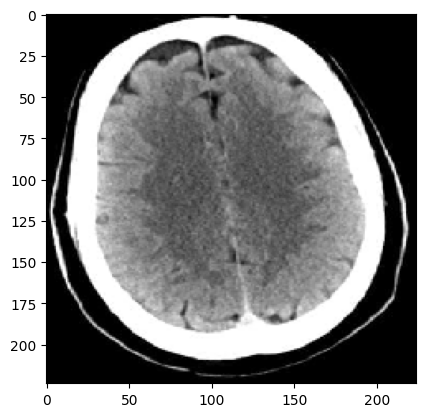

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Ruta a la nueva imagen
new_image_path = "/content/Normal-CT-head-2Age-30-40_es.jpg"  # Reemplaza con la ruta correcta de tu imagen

# Cargar y preprocesar la nueva imagen
new_image = image.load_img(new_image_path, target_size=(224, 224))
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0  # Normalizar los valores de píxeles al rango [0, 1]

# Mostrar la nueva imagen (opcional)
import matplotlib.pyplot as plt
plt.imshow(new_image[0])
plt.show()

In [ ]:
# Hacer la predicción en la nueva imagen
new_image_prediction = model.predict(new_image)

# Convertir la predicción a porcentaje de confianza
new_image_prediction_percent = np.round(new_image_prediction * 100, 2)

# Imprimir la predicción en porcentaje
print("Predicted Probability:", new_image_prediction_percent[0][0])

1/1 [==============================] - 0s 27ms/step
Predicted Probability: 34.95


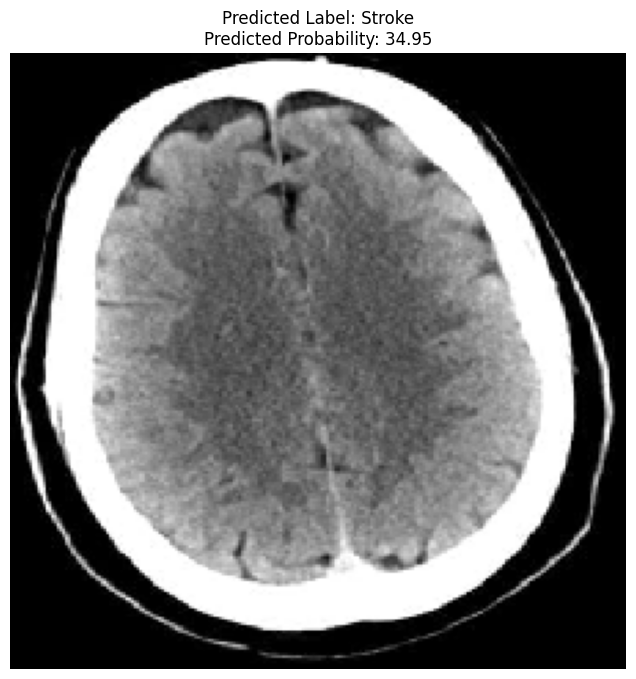

In [ ]:
# Establecer un umbral para decidir la etiqueta
umbral = 0.5

# Asignar la etiqueta basada en el umbral
if new_image_prediction_percent[0][0] >= umbral:
    predicted_label = "Stroke"
else:
    predicted_label = "Normal"

# Crear una figura para mostrar la nueva imagen y su etiqueta predicha
plt.figure(figsize=(8, 8))

# Mostrar la nueva imagen
plt.imshow(new_image[0])

# Configurar el título con la etiqueta predicha
plt.title(f"Predicted Label: {predicted_label}\nPredicted Probability: {new_image_prediction_percent[0][0]:.2f}")

# Desactivar los ejes para mejorar la presentación
plt.axis("off")

# Mostrar la figura
plt.show()

In [ ]:
# Guardar el modelo como SavedModel
model.save("/content/")

In [ ]:
# Guardar el modelo en formato h5
model.save("modelo.h5")

In [ ]:
from google.colab import files

# Descargar el archivo h5
files.download("modelo.h5")

In [ ]:
!pip install tensorflowjs

In [ ]:
tensorflowjs_converter --input_format=tf_saved_model \
                       --output_node_names="dense_2" \
                       ruta/a/tu/directorio_del_modelo \
                       ruta/a/tu/directorio_tfjs

In [ ]:
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs"></script>

In [ ]:
<script>
  async function loadModel() {
    // Cargar el modelo
    const model = await tf.loadLayersModel('ruta/a/tu/directorio_tfjs/model.json');

    // Hacer predicciones (ajusta según tus necesidades)
    const inputTensor = tf.tensor2d([[/* valores de entrada */]]);
    const prediction = model.predict(inputTensor);
    prediction.print();
  }

  // Llamar a la función cuando la página se cargue
  window.onload = loadModel;
</script>